In [2]:
#Fogler Example 6-2 Membrane Reactor
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

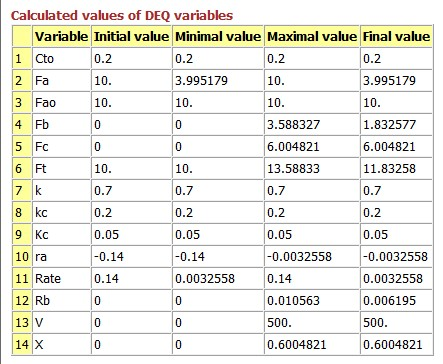

In [4]:
def ODEfun(V,Yfuncvec):

    FA = Yfuncvec[0]
    FB = Yfuncvec[1] 
    FC = Yfuncvec[2]

    # Explicit equations Inline
    Kc = 0.05 
    k = 0.7 
    Cto = 0.2 
    kc = 0.2 
    Ft = FA + FB + FC 
    ra = 0 - (k * Cto * (FA / Ft - (Cto / Kc * FB / Ft * FC / Ft))) 

    # Differential equations
    dFadV = ra 
    dFbdV = 0 - ra - (kc * Cto * FB / Ft) 
    dFcdV = 0 - ra 
    dYfuncVecdV = [dFadV, dFbdV, dFcdV]
    return dYfuncVecdV 

In [5]:
#test of ODEfun
tspan = [0, 1000]
y0 = [10, 0, 0]

sol=ODEfun(tspan[0],y0)
print(sol)

[-0.13999999999999999, 0.13999999999999999, 0.13999999999999999]


In [6]:
teval=np.linspace(tspan[0],tspan[1],20)

solODE=solve_ivp(ODEfun,tspan,y0,t_eval=teval)#solve the ODE 


print(solODE)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 140
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([   0.        ,   52.63157895,  105.26315789,  157.89473684,
        210.52631579,  263.15789474,  315.78947368,  368.42105263,
        421.05263158,  473.68421053,  526.31578947,  578.94736842,
        631.57894737,  684.21052632,  736.84210526,  789.47368421,
        842.10526316,  894.73684211,  947.36842105, 1000.        ])
 t_events: None
        y: array([[10.        ,  6.33971315,  5.51584315,  5.21130895,  5.00223379,
         4.81102173,  4.62351025,  4.43737622,  4.25852987,  4.08269238,
         3.90778932,  3.74329075,  3.58488246,  3.43075397,  3.28178947,
         3.13883557,  3.00367381,  2.8744495 ,  2.7499767 ,  2.62988028],
       [ 0.        ,  3.2968435 ,  3.57242479,  3.33492742,  3.03548749,
         2.75436019,  2.50392673,  2.28396814,  2.08555514,  1.91087024,
         1.75990155

Text(0, 0.5, 'Molar Flowrate (mol/min)')

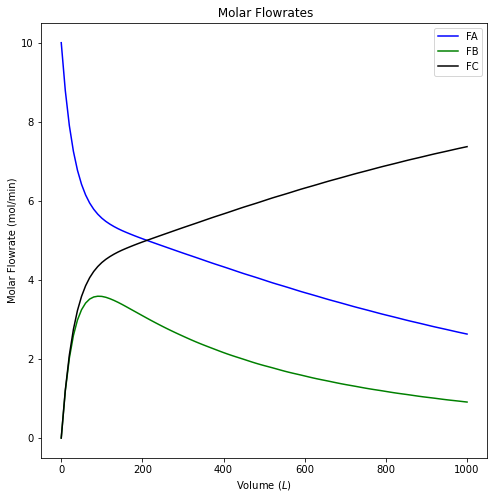

In [7]:
numrows=101
teval=np.linspace(tspan[0],tspan[1],numrows)
sol=solve_ivp(ODEfun,tspan,y0,t_eval=teval)
plt.figure(figsize=(8,8))

plt.subplot (1,1,1)
plt.plot(sol.t,sol.y[0],'b',label='FA')
plt.plot(sol.t,sol.y[1],'g',label='FB')
plt.plot(sol.t,sol.y[2],'k',label='FC')

plt.legend()
plt.title(' Molar Flowrates')
plt.xlabel('Volume $(L)$')
plt.ylabel('Molar Flowrate (mol/min)')

In [8]:
#Making a table of numbers 
Kc = 0.05 
k = 0.7 
Cto = 0.2 
kc = 0.2 
  
numrows=21
y0=[10,0,0]# Initial values for the F's 
tspan=(0,500)# start and end of the integration

teval=np.linspace(tspan[0],tspan[1],numrows)

sol=solve_ivp(ODEfun,tspan,y0,t_eval=teval,rtol=1e-6)
FT=np.zeros(numrows)
CA=np.zeros(numrows)
CB=np.zeros(numrows)
CC=np.zeros(numrows)
XA=np.zeros(numrows)
rA=np.zeros(numrows)

# print a table
print('Solution ')
print('    V         FA        FB          FC        FT         CA          CB         CC         XA           rA   ')
print('  (L)    (mol/min)  (mol/min)   (mol/min)   (mol/min)  (mol/L)  (mol/L)  (mol/L)           (mol/L/min)  ')    

row=0
for row in range(numrows):
    FA=sol.y[0,row]
    FB=sol.y[1,row]
    FC=sol.y[2,row]
    FT[row]=FA+FB+FC
    CA[row]=FA/FT[row]*Cto
    CB[row]=FB/FT[row]*Cto
    CC[row]=FC/FT[row]*Cto
    XA[row]=(sol.y[0,0]-sol.y[0,row])/sol.y[0,0]
    rA[row] = 0 - (k * Cto * (FA / FT[row] - (Cto / Kc * FB / FT[row] * FC / FT[row])))
   
    print('{:8.2f} {:10.3f} {:10.3f} {:10.3f} {:10.3f} {:10.3f}  {:10.3f} {:10.3f}  {:10.7f} {:12.4e}  '.format(sol.t[row],
                            sol.y[0,row],sol.y[1,row],sol.y[2,row],FT[row],CA[row],CB[row],CC[row],XA[row],rA[row] ))

Solution 
    V         FA        FB          FC        FT         CA          CB         CC         XA           rA   
  (L)    (mol/min)  (mol/min)   (mol/min)   (mol/min)  (mol/L)  (mol/L)  (mol/L)           (mol/L/min)  
    0.00     10.000      0.000      0.000     10.000      0.200       0.000      0.000   0.0000000  -1.4000e-01  
   25.00      7.550      2.335      2.450     12.335      0.122       0.038      0.040   0.2449616  -6.4648e-02  
   50.00      6.417      3.246      3.583     13.246      0.097       0.049      0.054   0.3583117  -3.0702e-02  
   75.00      5.861      3.547      4.139     13.547      0.087       0.052      0.061   0.4139225  -1.5771e-02  
  100.00      5.561      3.582      4.439     13.582      0.082       0.053      0.065   0.4438583  -9.0564e-03  
  125.00      5.378      3.504      4.622     13.504      0.080       0.052      0.068   0.4622059  -6.0200e-03  
  150.00      5.247      3.379      4.753     13.379      0.078       0.051      0.071   0.